# Chart 2

<img src="../charts/X8sDE-drone-strikes-and-close-combat-are-on-the-rise-while-shelling-events-decreased.png" alt="Chart as shown on original article]" width="700"/>

The data for the chart is based on the ACLED data collection. It was accessed in January 29. Details are available [here](https://acleddata.com/ukraine-conflict-monitor/).

In [1]:
# Importing packages
import pandas as pd

In [2]:
# Reading data
df = pd.read_csv("../data/ACLED/Ukraine_Black_Sea_2020_2025_Jan24.zip")

In [3]:
# Converting string to datetime
df['datetime'] = pd.to_datetime(df.event_date)

In [4]:
# Setting datetime as index
df = df.set_index("datetime")

In [5]:
# Kind of disorder types
df.disorder_type.value_counts()

Political violence                    188119
Strategic developments                  9804
Demonstrations                          6288
Political violence; Demonstrations        19
Name: disorder_type, dtype: int64

In [6]:
# Keeps only events of political violence (which include and consist mainly of fighting/bombing)
df = df[df.disorder_type=='Political violence']

In [7]:
# Over view of event types
df.event_type.value_counts()

Explosions/Remote violence    129547
Battles                        56987
Violence against civilians      1398
Riots                            187
Name: event_type, dtype: int64

In [8]:
# We will focus on the two types of explosions that make the bulk of the fighting
df[df.event_type=='Explosions/Remote violence'].sub_event_type.value_counts()

Shelling/artillery/missile attack    101951
Air/drone strike                      25658
Remote explosive/landmine/IED          1843
Grenade                                  90
Suicide bomb                              5
Name: sub_event_type, dtype: int64

In [9]:
# Armed clashes are the single point of interest here
df[df.event_type=='Battles'].sub_event_type.value_counts()

Armed clash                            56101
Non-state actor overtakes territory      556
Government regains territory             330
Name: sub_event_type, dtype: int64

In [10]:
# Violence against civilians will be covered with another data source
df[df.event_type=='Violence against civilians'].sub_event_type.value_counts()

Attack                            896
Abduction/forced disappearance    403
Sexual violence                    99
Name: sub_event_type, dtype: int64

In [11]:
# Also leaving out of the chart
df[df.event_type=='Riots'].sub_event_type.value_counts()

Mob violence    187
Name: sub_event_type, dtype: int64

Text(5, 0, 'Armed clashes')

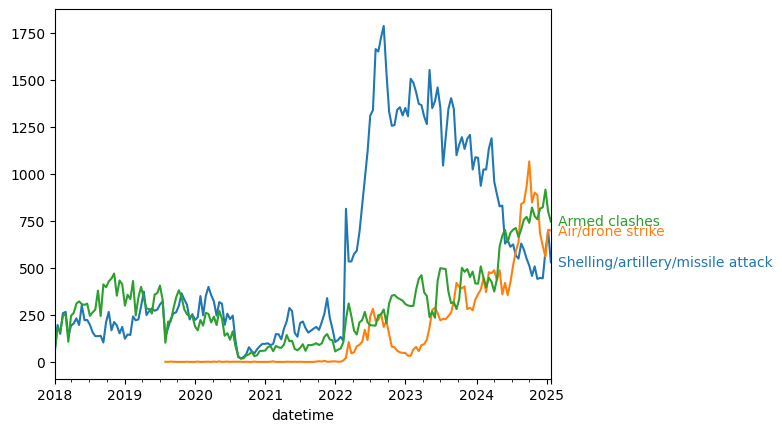

In [12]:
# Plot the data, resampled for every 2W as a preview
ax = df[df.sub_event_type=='Shelling/artillery/missile attack'].resample('2W').timestamp.count().plot()
df[df.sub_event_type=='Air/drone strike'].resample('2W').timestamp.count().plot(ax=ax)
df[df.sub_event_type=='Armed clash'].resample('2W').timestamp.count().plot(ax=ax)


# Get the line objects from the axes
lines = ax.get_lines()
line1, line2, line3 = lines[0], lines[1], lines[2]

# Extract last points for each line
x1, y1 = line1.get_xdata()[-1], line1.get_ydata()[-1]
x2, y2 = line2.get_xdata()[-1], line2.get_ydata()[-1]
x3, y3 = line3.get_xdata()[-1], line3.get_ydata()[-1]

# Annotate the lines
ax.annotate('Shelling/artillery/missile attack', 
            xy=(x1, y1), 
            xytext=(5, 0),  # 5 points right of the data point
            textcoords='offset points',
            ha='left', 
            va='center',
            color=line1.get_color())

ax.annotate('Air/drone strike', 
            xy=(x2, y2), 
            xytext=(5, 0), 
            textcoords='offset points',
            ha='left', 
            va='center',
            color=line2.get_color())

ax.annotate('Armed clashes', 
            xy=(x3, y3), 
            xytext=(5, 0), 
            textcoords='offset points',
            ha='left', 
            va='center',
            color=line3.get_color())

In [13]:
# Create resampled DataFrames for each event type
shelling = df[df.sub_event_type == 'Shelling/artillery/missile attack'].resample('2W').timestamp.count()
airstrike = df[df.sub_event_type == 'Air/drone strike'].resample('2W').timestamp.count()
armed_clash = df[df.sub_event_type == 'Armed clash'].resample('2W').timestamp.count()

In [14]:
# Combine into a single DataFrame
combined_df = pd.concat({
    'Shelling/artillery/missile attack': shelling,
    'Air/drone strike': airstrike,
    'Armed clash': armed_clash
}, axis=1)

In [15]:
# Fills nan
combined_df = combined_df.fillna(0)

In [16]:
# Save to CSV and use it in DataWrapper
combined_df.to_csv('../output/event_counts.csv', index=True)